In [1]:
import requests
from datetime import datetime

inityear = {'A': 2002, 'B': 2002, 'C': 1981, 'D': 2002, 'E': 2000}

today = datetime.now()
fin = today.year
conf = today.strftime("%Y%m%d")

for tf, ini in inityear.items():
    source = f'https://www.spensiones.cl/apps/valoresCuotaFondo/vcfAFPxls.php?aaaaini={ini}&aaaafin={fin}&tf={tf}&fecconf={conf}'
    r = requests.get(source)
    path = f'vcf{tf}{ini}-{fin}.csv'

    with open(path, 'wb') as out_file:
        out_file.write(r.content)

In [2]:
conf

'20220709'

In [3]:
import pandas as pd

In [6]:
dfA = pd.read_csv('vcfA2002-2022.csv', sep = ';', skiprows = 4, index_col = False, decimal = ',', thousands = ".")

In [7]:
dfA.columns

Index(['Unnamed: 0', 'Valor Cuota', 'Valor Patrimonio', 'Valor Cuota.1',
       'Valor Patrimonio.1', 'Valor Cuota.2', 'Valor Patrimonio.2',
       'Valor Cuota.3', 'Valor Patrimonio.3', 'Valor Cuota.4',
       'Valor Patrimonio.4', 'Valor Cuota.5', 'Valor Patrimonio.5',
       'Valor Cuota.6', 'Valor Patrimonio.6'],
      dtype='object')

In [8]:
cols = pd.MultiIndex.from_tuples([("Fecha",""), ("CUPRUM","Valor Cuota"), ("CUPRUM","Valor Patrimonio"), 
                                              ("HABITAT","Valor Cuota"), ("HABITAT","Valor Patrimonio"),
                                 ("MAGISTER","Valor Cuota"), ("MAGISTER","Valor Patrimonio"),
                                 ("PLANVITAL","Valor Cuota"), ("PLANVITAL","Valor Patrimonio"),
                                 ("PROVIDA","Valor Cuota"), ("PROVIDA","Valor Patrimonio"),
                                 ("SANTA MARIA","Valor Cuota"), ("SANTA MARIA","Valor Patrimonio"),
                                 ("SUMMA BANSANDER","Valor Cuota"),("SUMMA BANSANDER","Valor Patrimonio")])
# set cols to df.columns
dfA.columns = cols

In [15]:
dfA.loc[150:160]

Fecha       CUPRUM                        HABITAT  \
                          Valor Cuota  Valor Patrimonio  Valor Cuota   
150           2002-12-29    10.410,58       54935889795    10.208,77   
151           2002-12-30    10.417,59       55080514979    10.210,26   
152           2002-12-31    10.376,47       54863252770    10.169,90   
153  Valores Confirmados          NaN               NaN          NaN   
154                Fecha       CUPRUM               NaN      HABITAT   
155                  NaN  Valor Cuota  Valor Patrimonio  Valor Cuota   
156           2003-01-01    10.376,47       54863252770    10.169,90   
157           2003-01-02    10.417,34       55085548528    10.209,25   
158           2003-01-03    10.418,60       55090588917    10.213,08   
159           2003-01-04    10.418,60       55090588917    10.213,08   
160           2003-01-05    10.418,60       55090588917    10.213,08   

                          MAGISTER                      PLANVITAL  \
     Valor Patrimonio  Valor Cuota  Valor Patrimonio  Valor Cuota   
150      101067092915    10.312,88        6728888861    10.428,46   
151      101532143498    10.312,10        6723500265    10.432,64   
152      101130111809    10.294,75        6712190308    10.403,72   
153               NaN          NaN               NaN          NaN   
154               NaN     MAGISTER               NaN    PLANVITAL   
155  Valor Patrimonio  Valor Cuota  Valor Patrimonio  Valor Cuota   
156      101130111809    10.294,75        6712190308    10.403,72   
157      101510939871    10.331,61        6735861560    10.430,99   
158      101544840249    10.331,50        6735433472    10.425,04   
159      101544840249    10.331,50        6735433472    10.425,04   
160      101544840249    10.331,50        6735433472    10.425,04   

                           PROVIDA                    SANTA MARIA  \
     Valor Patrimonio  Valor Cuota  Valor Patrimonio  Valor Cuota   
150        4816621135    10.447,80       88296152161    10.284,86   
151        4830765467    10.454,85       89320332199    10.272,12   
152        4822155522    10.429,84       89089458183    10.220,81   
153               NaN          NaN               NaN          NaN   
154               NaN      PROVIDA               NaN  SANTA MARIA   
155  Valor Patrimonio  Valor Cuota  Valor Patrimonio  Valor Cuota   
156        4822155522    10.429,84       89089458183    10.220,81   
157        4834795140    10.467,81       89413790763    10.254,63   
158        4832136317    10.454,70       89281109507    10.247,00   
159        4832136317    10.454,70       89281109507    10.247,00   
160        4832136317    10.454,70       89281109507    10.247,00   

                       SUMMA BANSANDER                    
     Valor Patrimonio      Valor Cuota  Valor Patrimonio  
150       34268238742        10.381,39       57296806770  
151       34536705997        10.379,07       57279829182  
152       34364170324        10.328,96       57002088352  
153               NaN              NaN               NaN  
154               NaN  SUMMA BANSANDER               NaN  
155  Valor Patrimonio      Valor Cuota  Valor Patrimonio  
156       34364170324        10.328,96       57002088352  
157       34472805691        10.373,84       57249616428  
158       34444461830        10.381,42       57291419541  
159       34444461830        10.381,42       57291419541  
160       34444461830        10.381,42       57291419541

In [16]:
dfA = dfA.dropna().drop_duplicates()

In [18]:
dfA

Fecha      CUPRUM                      HABITAT                   \
                 Valor Cuota Valor Patrimonio Valor Cuota Valor Patrimonio   
0     2002-08-01   10.000,00                0   10.000,00                0   
1     2002-08-02   10.000,00                0   10.000,00                0   
2     2002-08-03   10.000,00                0   10.000,00                0   
3     2002-08-04   10.000,00                0   10.000,00                0   
4     2002-08-05   10.000,00                0   10.000,00                0   
...          ...         ...              ...         ...              ...   
7351  2022-07-03   57.801,96    4254480562083   60.110,67    5516886505374   
7352  2022-07-04   58.027,02    4263715818047   60.351,29    5532935572364   
7353  2022-07-05   57.759,02    4240716407051   60.082,43    5508205657536   
7354  2022-07-06   58.335,82    4284845552745   60.622,19    5556287161474   
7355  2022-07-07   59.468,29    4384927921916   61.773,17    5672541513954   

        MAGISTER                    PLANVITAL                      PROVIDA  \
     Valor Cuota Valor Patrimonio Valor Cuota Valor Patrimonio Valor Cuota   
0      10.000,00                0   10.000,00                0   10.000,00   
1      10.000,00                0   10.000,00                0   10.000,00   
2      10.000,00                0   10.000,00                0   10.000,00   
3      10.000,00                0   10.000,00                0   10.000,00   
4      10.000,00                0   10.000,00                0   10.000,00   
...          ...              ...         ...              ...         ...   
7351   61.344,57    6670212635757   58.253,13    1307373698433   55.953,31   
7352   61.561,39    6684702193651   58.456,83    1309894371510   56.159,60   
7353   61.292,13    6651261680592   58.181,82    1302927261278   55.898,09   
7354   61.849,29    6713031776908   58.737,57    1315212354936   56.444,40   
7355   63.005,83    6836840883978   59.881,30    1341973953106   57.519,47   

                      SANTA MARIA                  SUMMA BANSANDER  \
     Valor Patrimonio Valor Cuota Valor Patrimonio     Valor Cuota   
0                   0   10.000,00                0       10.000,00   
1                   0   10.000,00                0       10.000,00   
2                   0   10.000,00                0       10.000,00   
3                   0   10.000,00                0       10.000,00   
4                   0   10.000,00                0       10.000,00   
...               ...         ...              ...             ...   
7351     648289048274   60.110,30    3928668488274       60.155,87   
7352     650150136727   60.312,56    3938481060836       60.359,31   
7353     646943993925   60.023,84    3917978618795       60.085,79   
7354     653238617511   60.532,37    3951100335706       60.624,23   
7355     665786499983   61.645,22    4031695996233       61.837,48   

                       
     Valor Patrimonio  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
7351     135116317111  
7352     135568663420  
7353     134904553330  
7354     136266274972  
7355     139007264828  

[1589 rows x 15 columns]

In [23]:
dfA.loc[7340:]

Fecha      CUPRUM                      HABITAT                   \
                 Valor Cuota Valor Patrimonio Valor Cuota Valor Patrimonio   
7340  2022-06-22   55.568,11    4113483479277   57.762,78    5331663105403   
7341  2022-06-23   55.618,61    4112544228244   57.837,08    5330377999116   
7342  2022-06-24   56.293,72    4163432425355   58.536,22    5392284130403   
7343  2022-06-25   56.293,72    4163432425355   58.536,22    5392284130403   
7344  2022-06-26   56.293,72    4163432425355   58.536,22    5392284130403   
7345  2022-06-27   56.293,72    4163432425355   58.536,22    5392284130403   
7346  2022-06-28   57.904,55    4285392732764   60.216,15    5546564867024   
7347  2022-06-29   57.336,20    4236511051971   59.638,04    5487350530784   
7348  2022-06-30   57.610,32    4245396198687   59.902,48    5497585392232   
7349  2022-07-01   57.801,96    4254480562083   60.110,67    5516886505374   
7350  2022-07-02   57.801,96    4254480562083   60.110,67    5516886505374   
7351  2022-07-03   57.801,96    4254480562083   60.110,67    5516886505374   
7352  2022-07-04   58.027,02    4263715818047   60.351,29    5532935572364   
7353  2022-07-05   57.759,02    4240716407051   60.082,43    5508205657536   
7354  2022-07-06   58.335,82    4284845552745   60.622,19    5556287161474   
7355  2022-07-07   59.468,29    4384927921916   61.773,17    5672541513954   

        MAGISTER                    PLANVITAL                      PROVIDA  \
     Valor Cuota Valor Patrimonio Valor Cuota Valor Patrimonio Valor Cuota   
7340   58.924,29    6444052258203   55.965,87    1261371270196   53.828,92   
7341   59.002,31    6442280173205   56.024,36    1261251909776   53.845,88   
7342   59.696,31    6512454626717   56.707,13    1276308527849   54.492,79   
7343   59.696,31    6512454626717   56.707,13    1276308527849   54.492,79   
7344   59.696,31    6512454626717   56.707,13    1276308527849   54.492,79   
7345   59.696,31    6512454626717   56.707,13    1276308527849   54.492,79   
7346   61.405,51    6694112176917   58.393,55    1312713123078   56.089,94   
7347   60.829,50    6618003555830   57.782,27    1297501575337   55.568,51   
7348   61.114,18    6646274711160   58.046,60    1303602332035   55.818,59   
7349   61.344,57    6670212635757   58.253,13    1307373698433   55.953,31   
7350   61.344,57    6670212635757   58.253,13    1307373698433   55.953,31   
7351   61.344,57    6670212635757   58.253,13    1307373698433   55.953,31   
7352   61.561,39    6684702193651   58.456,83    1309894371510   56.159,60   
7353   61.292,13    6651261680592   58.181,82    1302927261278   55.898,09   
7354   61.849,29    6713031776908   58.737,57    1315212354936   56.444,40   
7355   63.005,83    6836840883978   59.881,30    1341973953106   57.519,47   

                      SANTA MARIA                  SUMMA BANSANDER  \
     Valor Patrimonio Valor Cuota Valor Patrimonio     Valor Cuota   
7340     624851609043   57.803,72    3787207561565       57.694,45   
7341     624884645935   57.894,11    3792911716278       57.783,11   
7342     632114307328   58.566,51    3835654497741       58.483,27   
7343     632114307328   58.566,51    3835654497741       58.483,27   
7344     632114307328   58.566,51    3835654497741       58.483,27   
7345     632114307328   58.566,51    3835654497741       58.483,27   
7346     650464442629   60.201,07    3950849255837       60.273,59   
7347     643723083213   59.616,10    3910824561130       59.636,29   
7348     645036982943   59.913,96    3918937777192       59.933,11   
7349     648289048274   60.110,30    3928668488274       60.155,87   
7350     648289048274   60.110,30    3928668488274       60.155,87   
7351     648289048274   60.110,30    3928668488274       60.155,87   
7352     650150136727   60.312,56    3938481060836       60.359,31   
7353     646943993925   60.023,84    3917978618795       60.085,79   
7354     653238617511   60.532,37    3951100335706       60.624,23   
7355     66

In [24]:
dfA["Fecha"] = pd.to_datetime(dfA["Fecha"])
dfA.index = dfA["Fecha"]

In [25]:
dfA.loc[:,('PLANVITAL', 'Valor Cuota')] = [float(str(i).replace(",", "")) for i in dfA['PLANVITAL']['Valor Cuota'].values]

<AxesSubplot:title={'center':'FondoA - Valores Cuota'}, xlabel='Fecha'>

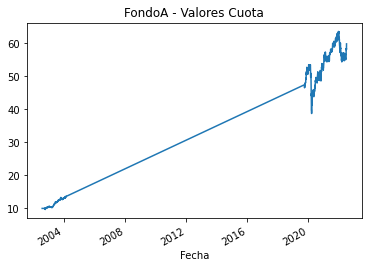

In [26]:
dfA['PLANVITAL']['Valor Cuota'].plot(title = 'FondoA - Valores Cuota')

<AxesSubplot:title={'center':'FondoA - Valores Cuota'}, xlabel='Fecha'>

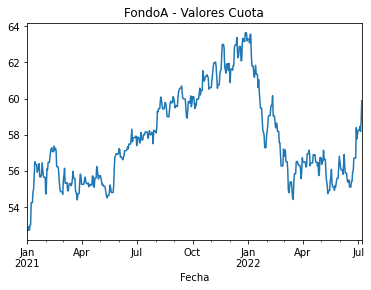

In [27]:
dfA['PLANVITAL']['Valor Cuota'].loc[dfA.index.year >= 2021].plot(title = 'FondoA - Valores Cuota')

<AxesSubplot:title={'center':'FondoA - Valores Cuota'}, xlabel='Fecha'>

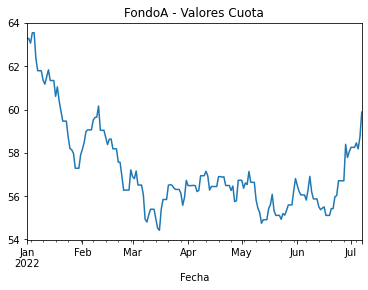

In [28]:
dfA['PLANVITAL']['Valor Cuota'].loc[(dfA.index.year == 2022)].plot(title = 'FondoA - Valores Cuota')

In [33]:
dfA.loc[:,('PLANVITAL','Rentabilidad')] = dfA['PLANVITAL']['Valor Cuota'].pct_change(1)

In [35]:
dfA['PLANVITAL'].tail()

,Valor Cuota,Valor Patrimonio,Rentabilidad
Fecha,,,
2022-07-03,58.25313,1307373698433,0.000000
2022-07-04,58.45683,1309894371510,0.003497
2022-07-05,58.18182,1302927261278,-0.004704
2022-07-06,58.73757,1315212354936,0.009552
2022-07-07,59.88130,1341973953106,0.019472


<AxesSubplot:title={'center':'FondoA - Rentabilidad'}, xlabel='Fecha'>

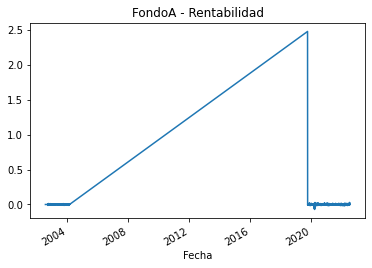

In [31]:
dfA['PLANVITAL']['Rentabilidad'].plot(title = 'FondoA - Rentabilidad')

<AxesSubplot:title={'center':'FondoA - Rentabilidad'}, xlabel='Fecha'>

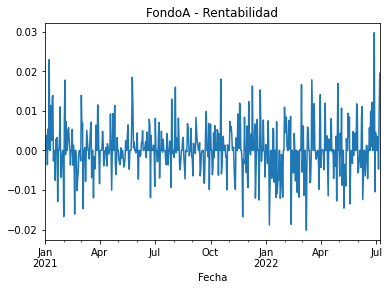

In [32]:
dfA['PLANVITAL']['Rentabilidad'].loc[dfA.index.year >= 2021].plot(title = 'FondoA - Rentabilidad')

<AxesSubplot:xlabel='Fecha'>

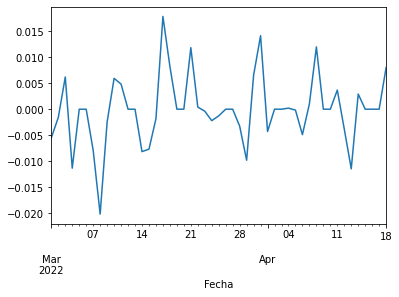

In [155]:
dfA['PLANVITAL']['Rentabilidad'].loc[(dfA.index.year == 2022) & (dfA.index.month >= 3)].plot()

In [36]:
tmp = dfA['PLANVITAL'].asfreq('M')['Valor Cuota'].pct_change()

In [37]:
tmp

Fecha
2002-08-31         NaN
2002-09-30    0.010951
2002-10-31   -0.007575
2002-11-30    0.024788
2002-12-31    0.011875
                ...   
2022-02-28   -0.012112
2022-03-31   -0.008473
2022-04-30    0.000052
2022-05-31    0.001430
2022-06-30    0.021754
Freq: M, Name: Valor Cuota, Length: 239, dtype: float64

<AxesSubplot:xlabel='Fecha'>

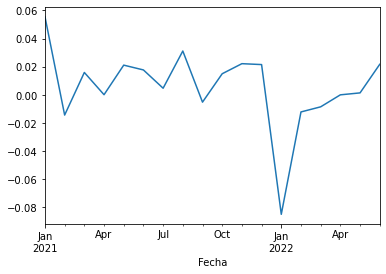

In [38]:
tmp.loc[tmp.index.year >= 2021].plot()